# Some Python Data Science Resources

## Python

Use a scientific Python distribution `Anaconda` (I use Python 2.7 version) which comes together with lots of libraries, jupyter notebook.. The distribution can be installed locally in the home directory..

### General libraries

- `numpy` : **fast array library**
- `scipy` : various higher level scientific routines
- `matplotlib` : a plotting library

### More specialized libraries

- `scikit-learn` : **machine learning library - lots of implemented machine learning algorithms**
- `pandas` : R-like concepts like `data.frame`
- `scikit-image` : various computer vision algorithms
- `opencv` : bindings to a powerful C++ computer vision library
- ...

### Neural networks

- `keras` : **very easy to use and flexible**
- `lasagne`
- `caffe`
- `mxnet` : fast and efficient

### Other

- `xgboost` : **very good and fast gradient boosted trees**
- `rpy2` : do computations using R from Python...
- `mne-python` : library for analyzing/plotting EEG/MEG data
- `pyeeg` : some utilities for analyzing (EEG) time-series data
- ...

# scikit-learn examples


`scikit-learn` implements a bewildering number of algorithms. It has a very good user manual but it is very easy to get lost which algorithms to use...

Fortunately it is enough to use just a basic few:

**classification:** Logistic Regression, Support Vector Machine, Nearest Neighbour, Random Forest, Gradient Boosted Trees

**regression:** Ridge, regression versions of the above

**unsupervised:** RandomizedPCA, FastICA, K-Means (clustering)

For neural networks and gradient boosted trees for large datasets its better to use other libraries (`keras`, `xgboost`)

## Example: recognizing handwritten digits

Load necessary libraries:

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
from sklearn import datasets

Load a toy version of handwritten digits: only 8x8

In [2]:
digits = datasets.load_digits()
print digits.images.shape

(1797, 8, 8)


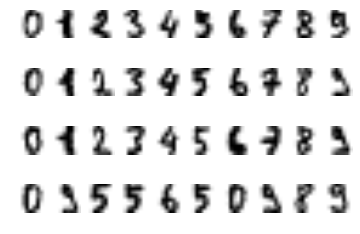

In [3]:
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.axis('off')
    plt.imshow(digits.images[i],cmap=plt.cm.gray_r)
plt.show()

In [4]:
print digits.target[:40]

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9]


### Prepare data

It may be good to shuffle the data...

In [5]:
random.seed(555)
random.shuffle(digits.images)
random.seed(555)
random.shuffle(digits.target)

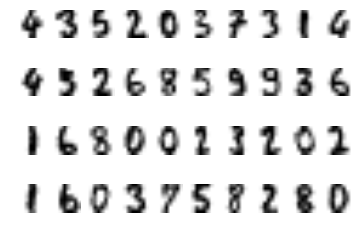

[4 3 5 2 0 3 7 3 1 4 4 5 2 6 8 5 9 9 3 6 1 6 8 0 0 2 3 2 0 2 1 6 0 3 7 5 8
 2 8 0]


In [6]:
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.axis('off')
    plt.imshow(digits.images[i],cmap=plt.cm.gray_r)
plt.show()
print digits.target[:40]

Most classifiers require vectors of numbers - transform images to 64 element vectors

**Note:** in this way we loose geometrical information which pixels are neighbouring.. (this is only recovered in Convolutional Neural Networks - see later)

In [7]:
data=digits.images.reshape((len(digits.images),-1))
print data.shape
n=len(data)

(1797, 64)


Check the range of data

In [8]:
print amin(data), amax(data)

0.0 16.0


Normalize to the interval [0,1]

In [9]:
data[:,:]=data/16.0
print amin(data), amax(data)

0.0 1.0


### Create training and test data

**Never** test your model on the same data that you used to train it - split the whole dataset into a separate train and test set. The best way to do it is to use say 5-fold cross-validation (CV): split data into 5 chunks and then make 5 splits into train/test datasets.

Then choose classifier and its parameters based on its performance on all the 5 splits..

In [10]:
from sklearn.cross_validation import KFold
kf=KFold(20, n_folds=5)
for tr, tst in kf:
    print 'train:', tr, 'test:', tst

train: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] test: [0 1 2 3]
train: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] test: [4 5 6 7]
train: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] test: [ 8  9 10 11]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] test: [12 13 14 15]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] test: [16 17 18 19]


There is a more refined version which tries to keep the proportions of the classes same in each fold (`KStratifiedFold`).

Here for simplicity we will make just a single split...

In [11]:
nn=2*n/3
X=data[:nn]
y=digits.target[:nn]
Xt=data[nn:]
yt=digits.target[nn:]

## Linear models

The first thing to try is the simplest linear model - for classification this is `LogisticRegression`, for regression this is `Ridge`.

- it will be a baseline for more advanced models
- for (noisy) data with lots of features it works remarkably well
- there is only a single parameter to tune (the amount of *regularization* to control overfitting/dependence on outliers)
- for regularization to work one should have all features to have a comparable numerical range
- then the magnitudes of linear coefficients indicate something about the features importance [**note:** there are much more sophisticated ways for analyzing that]

In [12]:
from sklearn.linear_model import *
from sklearn.metrics import *

In [13]:
clf=LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
preds=clf.predict(Xt)

In [15]:
print accuracy_score(yt,preds)

0.961602671119


In [16]:
print preds[10:30], yt[10:30]

[3 9 5 7 1 0 5 9 3 3 9 4 3 3 6 9 4 6 1 8] [3 9 5 7 1 0 5 9 3 3 9 4 3 3 6 9 4 6 3 8]


In [17]:
print confusion_matrix(yt,preds)

[[50  0  0  0  0  0  0  0  0  0]
 [ 0 63  2  0  0  0  1  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  1  1 49  0  0  0  2  0  0]
 [ 0  1  0  0 67  0  0  0  1  1]
 [ 0  0  0  0  0 65  0  0  0  0]
 [ 0  1  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0 63  1  1]
 [ 0  3  0  0  0  0  2  0 50  0]
 [ 0  1  0  1  0  1  0  0  2 63]]


rows: true classes; columns: predicted classes

We can examine the coefficients corresponding to the class of `0`

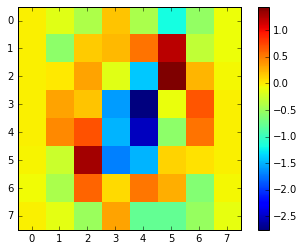

In [18]:
cfs0=clf.coef_[0].reshape((8,8))
plt.imshow(cfs0,interpolation="nearest")
plt.colorbar()
plt.show()

In [19]:
clf=LogisticRegressionCV()
clf.fit(X,y)
preds=clf.predict(Xt)

In [20]:
print accuracy_score(yt,preds)

0.966611018364


In [21]:
clf.C_

array([   2.7825594 ,   21.5443469 ,   21.5443469 ,    2.7825594 ,
         21.5443469 ,    2.7825594 ,   21.5443469 ,  166.81005372,
          2.7825594 ,   21.5443469 ])

## Support Vector Machines

These can be either linear or nonlinear - here the default is nonlinear and the nonlinearity is parametrized by a gaussian *kernel* (kernel=`rbf` - radial basis functions). One has to set two parameters: regularization parameter `C` and the width of the gaussian


In [22]:
from sklearn.svm import SVC
clf = SVC(C=100,gamma=0.01)
clf.fit(X,y)
preds=clf.predict(Xt)

In [23]:
print accuracy_score(yt,preds)

0.986644407346


In [24]:
print confusion_matrix(yt,preds)

[[50  0  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  0]
 [ 0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  1]
 [ 0  1  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  1]
 [ 0  1  0  0  1  0  0  0 53  0]
 [ 0  0  0  1  0  1  0  0  0 66]]


Default parameters:

In [25]:
clf = SVC()
clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

0.954924874791


## Random Forest

Very good strictly nonlinear classifier, essentially one key parameter `n_estimators` (number of trees) - the more the better...

In [27]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [28]:
clf=RFC(n_estimators=500)
clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

0.976627712855


## Gradient Boosted Trees

Very good nonlinear classifier (often better than Random Forest) - more parameters to tune: number of trees, learning rate, size of the trees.

For more complex datasets often *much* better than linear models...

In [29]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [30]:
clf=GBC(n_estimators=500)
clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

0.964941569282


A very good implementation (fast and multithreaded for large datasets) is `xgboost`

In [31]:
from xgboost import XGBClassifier

In [32]:
clf=XGBClassifier(max_depth=3, n_estimators=500)
clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

0.964941569282


## Nearest neighbours

Makes classification according to *k* nearest neighbours.

**Note:** Problems for high dimensional data: * The curse of dimensionality *

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
clf=KNeighborsClassifier()
clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

0.986644407346


In [35]:
print confusion_matrix(yt,preds)

[[50  0  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  1  0  0]
 [ 0  0  0  0 69  0  0  1  0  0]
 [ 0  0  0  0  0 65  0  0  0  0]
 [ 0  0  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  1]
 [ 0  3  1  0  0  0  0  0 51  0]
 [ 0  1  0  0  0  0  0  0  0 67]]


# Neural networks

 `keras` - a very good neural network library
 
 - very easy to use
 - can use graphic card GPU's (NVIDIA only!) for computation - **crucial** for larger convolutional networks
 - can produce more involved network topologies (multiple inputs/outputs, merges between various layers) - so called Functional API
 - includes all basic layer types including convolutional, recurrent
 - based either on `Theano` or `TensorFlow` low-level backend

There exist other possibilities: `caffe`, `lasagne`, `mxnet`,...


In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.advanced_activations import *

Using Theano backend.


In [37]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
from keras.utils.np_utils import to_categorical
ys=to_categorical(y)

In [40]:
print y[1], ys[1]

3 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [41]:
model.fit(X, y, nb_epoch=30, batch_size=128, validation_data=(Xt,yt))

Train on 1198 samples, validate on 599 samples
Epoch 1/30
1198/1198 [==============================] - 0s - loss: 2.3119 - acc: 0.0968 - val_loss: 2.1954 - val_acc: 0.2187
Epoch 2/30
1198/1198 [==============================] - 0s - loss: 2.1235 - acc: 0.3982 - val_loss: 2.0218 - val_acc: 0.5593
Epoch 3/30
1198/1198 [==============================] - 0s - loss: 1.9297 - acc: 0.6427 - val_loss: 1.8328 - val_acc: 0.6778
Epoch 4/30
1198/1198 [==============================] - 0s - loss: 1.7158 - acc: 0.7362 - val_loss: 1.6118 - val_acc: 0.7396
Epoch 5/30
1198/1198 [==============================] - 0s - loss: 1.4703 - acc: 0.7771 - val_loss: 1.3587 - val_acc: 0.7663
Epoch 6/30
1198/1198 [==============================] - 0s - loss: 1.2069 - acc: 0.8155 - val_loss: 1.1003 - val_acc: 0.8080
Epoch 7/30
1198/1198 [==============================] - 0s - loss: 0.9628 - acc: 0.8606 - val_loss: 0.8839 - val_acc: 0.8447
Epoch 8/30
1198/1198 [==============================] - 0s - loss: 0.7643 - ac

In [42]:
preds=model.predict_classes(Xt)
print
print accuracy_score(yt,preds)

599/599 [==============================] - 0s     

0.961602671119


### Comments

- this dataset is very simple and small
- therefore simpler models work as well or better than more complex ones
- for various kinds of datasets various algorithms are best - there is no single best one